## <span style="color:#2F749F;"><strong>📦 Sesión práctica 2: Análisis Univariado, bivariado y multivariado</strong></span>
---
<p align="right">
  <a href="https://colab.research.google.com/#create=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:#1a73e8;"><strong>Datos del estudiante</strong></span>

In [1]:
nombre = input("📝 Ingresa tu nombre completo: ")
correo = input("📧 Ingresa tu correo electrónico: ")
cedula = input("🔢 Ingresa los últimos 6 dígitos de tu cédula: ")

In [2]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## <span style="color:#1a73e8;"><strong>Parte 1: Análisis Univariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio 1: Cálculo de medidas de tendencia central</strong></span>

A partir de una muestra simulada que representa el número de eventos de apnea por noche durante 100 noches, se realizan los siguientes pasos:

1. Utilizar el número base `505918`.  
2. Con este número generar una semilla (`np.random.seed`) para que los resultados sean reproducibles.  
3. El número de eventos de apnea por noche se simulan con una distribución normal:  
   - Media teórica: `(base % 10) + 2`  
   - Desviación estándar: `4`  
   - Tamaño de muestra: `100`  
4. Los valores negativos se reemplazan por cero.  
5. Graficar resultados 

In [23]:
# --- Establecer el valor base a partir del número de cédula ---
base = int(cedula)  # convertir número de cédula a entero
print('Base:', base)

# --- Fijar semilla para reproducibilidad ---
np.random.seed(base)

# --- Parámetros para la distribución normal ---
theoretical_mean = (base % 10) + 2  # media teórica
std_dev = 4                          # desviación estándar
sample_size = 100                    # tamaño de la muestra

# --- Simular número de eventos de apnea por noche ---
apnea_events = np.random.normal(loc=theoretical_mean, scale=std_dev, size=sample_size).round(0)

# --- Reemplazar valores negativos por cero (no puede haber eventos negativos) ---
apnea_events = np.clip(apnea_events, 0, None)

# --- Calcular estadísticas ---
median_val = np.median(apnea_events)
mean_val = np.mean(apnea_events)
mode_val = stats.mode(apnea_events, keepdims=True)[0][0]

# --- Imprimir estadísticas ---
print(f'Moda (número de eventos más común): {mode_val} eventos/noche')
print(f'Mediana: {median_val} eventos/noche')
print(f'Media: {mean_val:.2f} eventos/noche')

# --- Mostrar los primeros 10 valores simulados ---
print('Primeras 10 noches simuladas:', apnea_events[:10])



Base: 505918
Moda (número de eventos más común): 9.0 eventos/noche
Mediana: 9.0 eventos/noche
Media: 9.50 eventos/noche
Primeras 10 noches simuladas: [ 5.  9.  6. 14.  1. 10. 13. 13.  8.  5.]


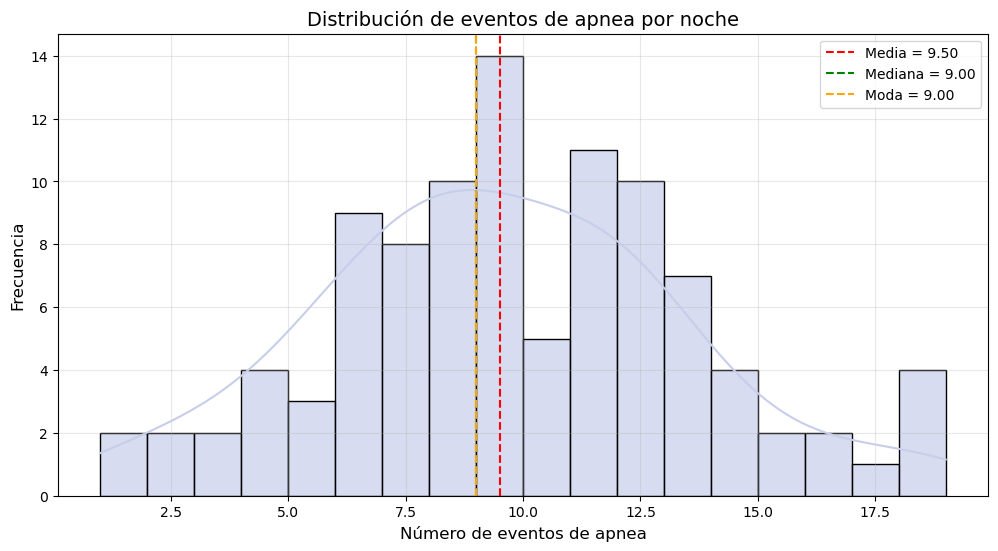


Intervalos y frecuencias:
[1.00, 2.00) -> 2
[2.00, 3.00) -> 2
[3.00, 4.00) -> 2
[4.00, 5.00) -> 4
[5.00, 6.00) -> 3
[6.00, 7.00) -> 9
[7.00, 8.00) -> 8
[8.00, 9.00) -> 10
[9.00, 10.00) -> 14
[10.00, 11.00) -> 5
[11.00, 12.00) -> 11
[12.00, 13.00) -> 10
[13.00, 14.00) -> 7
[14.00, 15.00) -> 4
[15.00, 16.00) -> 2
[16.00, 17.00) -> 2
[17.00, 18.00) -> 1
[18.00, 19.00) -> 4


In [24]:
plt.figure(figsize=(12, 6))

# --- Histograma con KDE (densidad suavizada) ---
sns.histplot(apnea_events, bins=18, kde=True, color="#c7ceea", edgecolor='black', alpha=0.7)

# --- Agregar líneas verticales para la media, mediana y moda ---
plt.axvline(mean_val, color='red', linestyle='--', label=f'Media = {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', label=f'Mediana = {median_val:.2f}')
plt.axvline(mode_val, color='orange', linestyle='--', label=f'Moda = {mode_val:.2f}')

# --- Título y etiquetas de los ejes ---
plt.title("Distribución de eventos de apnea por noche", fontsize=14)
plt.xlabel("Número de eventos de apnea", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

# --- Agregar leyenda y cuadrícula ---
plt.legend()
plt.grid(True, alpha=0.3)

# --- Mostrar la gráfica ---
plt.show()

# --- Mostrar intervalos y frecuencias ---
frecuencias, bordes = np.histogram(apnea_events, bins=18)
print("\nIntervalos y frecuencias:")
for i in range(len(frecuencias)):
    print(f"[{bordes[i]:.2f}, {bordes[i+1]:.2f}) -> {frecuencias[i]}")

### ***Análisis***

Los datos simulados sobre el número de eventos de apnea por noche se distribuyen en un rango que va aproximadamente de 1 a 19. Dentro de este intervalo, se observa que la mayor parte de los valores se concentra en torno al centro de la distribución. El promedio se sitúa en 9.5, mientras que el valor que divide la distribución en dos partes iguales es 9, y el número de eventos de apnea que se presenta con mayor frecuencia coincide con este último. Esta proximidad entre las tres medidas indica una estructura equilibrada, sin evidencias de sesgos marcados hacia valores bajos o altos.

El histograma confirma esta observación al mostrar que las frecuencias más elevadas se concentran en los intervalos centrales, particularmente entre 8.00 y 13.00, donde se agrupa la mayoría de las observaciones. Dentro de este rango, destacan los intervalos [9.00, 10.00) que registran las frecuencias más altas, seguidos por [11.00, 13.00), que también presenta una participación considerable. En términos generales, la distribución evidencia una concentración en torno a la zona media, acompañada de una reducción gradual hacia los valores extremos.




### <span style="color:#2F749F;"><strong>Ejercicio 2: Cálculo de medidas de dispersión</strong></span>

A partir de la muestra generada en el Ejercicio 1, analizar qué tan dispersos están los datos respecto a su media. Calcular:
1. Rango
2. Varianza
3. Desviación estándar
4. Coeficiente de variación
5. Genera una gráfica con los resultados obtenidos 

In [25]:
# --- Medidas de dispersión de los datos simulados ---
minimum = np.min(apnea_events)                # valor mínimo
maximum = np.max(apnea_events)                # valor máximo

range_val = maximum - minimum                    # rango (máximo - mínimo)
apnea_events_series = pd.Series(apnea_events)
range_IQR = apnea_events_series.quantile(0.75) - apnea_events_series.quantile(0.25)

variance = np.var(apnea_events, ddof=1)       # varianza muestral
std_dev = np.std(apnea_events, ddof=1)        # desviación estándar muestral
coef_var = std_dev / mean_val                    # coeficiente de variación

# --- Imprimir medidas de dispersión ---
print("\nMedidas de dispersión:")
print(f"Mínimo: {minimum} eventos/noche")
print(f"Máximo: {maximum} eventos/noche\n")

print(f"Rango: {range_val} eventos/noche")
print(f"Rango intercuartílico: {range_IQR}\n")

print(f"Varianza: {variance:.2f} (eventos/noche)^2")
print(f"Desviación estándar: {std_dev:.2f} eventos/noche")
print(f"Coeficiente de variación: {coef_var:.2f}")


Medidas de dispersión:
Mínimo: 1.0 eventos/noche
Máximo: 19.0 eventos/noche

Rango: 18.0 eventos/noche
Rango intercuartílico: 5.0

Varianza: 15.06 (eventos/noche)^2
Desviación estándar: 3.88 eventos/noche
Coeficiente de variación: 0.41


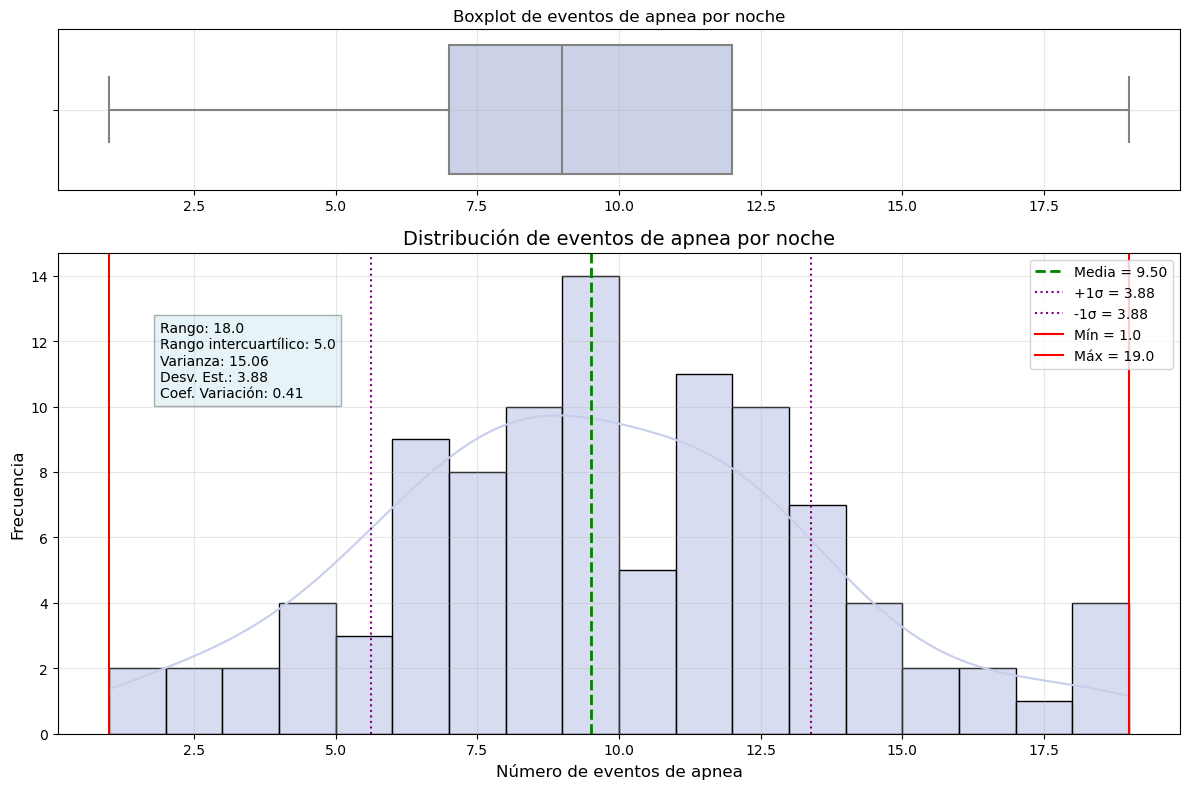

In [ ]:
# --- Crear figura con dos subplots ---
fig, axes = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 3]})

# --- Subplot 1: Boxplot ---
sns.boxplot(x=apnea_events, ax=axes[0], color="#c7ceea")
axes[0].set_title("Boxplot de eventos de apnea por noche", fontsize=12)
axes[0].set_xlabel("") 
axes[0].grid(alpha=0.3)

# --- Subplot 2: Histograma con KDE ---
sns.histplot(apnea_events, bins=18, kde=True, color="#c7ceea", edgecolor='black', alpha=0.7, ax=axes[1])

# --- Líneas verticales para medidas de tendencia y dispersión ---
axes[1].axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Media = {mean_val:.2f}')
axes[1].axvline(mean_val + std_dev, color='purple', linestyle=':', linewidth=1.5, label=f'+1σ = {std_dev:.2f}')
axes[1].axvline(mean_val - std_dev, color='purple', linestyle=':', linewidth=1.5, label=f'-1σ = {std_dev:.2f}')
axes[1].axvline(minimum, color='red', linestyle='-', linewidth=1.5, label=f'Mín = {minimum}')
axes[1].axvline(maximum, color='red', linestyle='-', linewidth=1.5, label=f'Máx = {maximum}')

# --- Título y etiquetas de ejes ---
axes[1].set_title("Distribución de eventos de apnea por noche", fontsize=14)
axes[1].set_xlabel("Número de eventos de apnea", fontsize=12)
axes[1].set_ylabel("Frecuencia", fontsize=12)

# --- Leyenda ---
axes[1].legend(fontsize=10)

# --- Agregar cuadro de texto con medidas de dispersión ---
y_text = axes[1].get_ylim()[1] * 0.7  # 70% del eje Y
x_text = minimum + (maximum - minimum) * 0.05  # 5% desde la izquierda
text_box = (
    f"Rango: {range_val}\n"
    f"Rango intercuartílico: {range_IQR}\n"
    f"Varianza: {variance:.2f}\n"
    f"Desv. Est.: {std_dev:.2f}\n"
    f"Coef. Variación: {coef_var:.2f}"
)
axes[1].text(x_text, y_text, text_box, bbox=dict(facecolor='lightblue', alpha=0.3), fontsize=10)

axes[0].grid(True, alpha=0.3)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### ***Análisis***

Los datos simulados sobre el número de eventos de apnea por noche muestran una variabilidad apreciable. El rango total es de 18 eventos por noche, lo que indica una diferencia significativa entre los valores mínimos (1) y máximos (19) registrados. El rango intercuartílico (IQR) es de 5 eventos, lo que sugiere que el 50% de las noches presentan valores relativamente próximos entre sí, aunque no tan compactos como para considerar la dispersión baja. 

La desviación estándar es de 3.88 eventos, lo que significa que, en promedio, los datos se desvían en aproximadamente cuatro unidades respecto al valor medio. El coeficiente de variación, de 0.41, indica una dispersión moderada en relación con la media, lo que confirma que la variabilidad no es despreciable.

El análisis visual complementa estas medidas: el histograma muestra que la mayor concentración de frecuencias se encuentra en la zona central, mientras que las colas presentan menor densidad, aunque se extienden hacia valores más altos, ampliando el rango total. El boxplot refuerza esta interpretación al mostrar un rango intercuartílico moderado y la ausencia de valores atípicos, lo que sugiere que, aunque existen observaciones alejadas del centro, estas no son lo suficientemente extremas como para considerarse outliers.

### <span style="color:#2F749F;"><strong>Ejercicio 3: Cálculo de medidas de distribución</strong></span>

A partir de la muestra generada en el Ejercicio 1, analiza la distribución de los datos. Calcula:
1. Asimetría
2. Curtosis
3. Realizar la comparación con la distribución normal


Medidas de distribución:
Asimetría: 0.17
Curtosis: -0.06


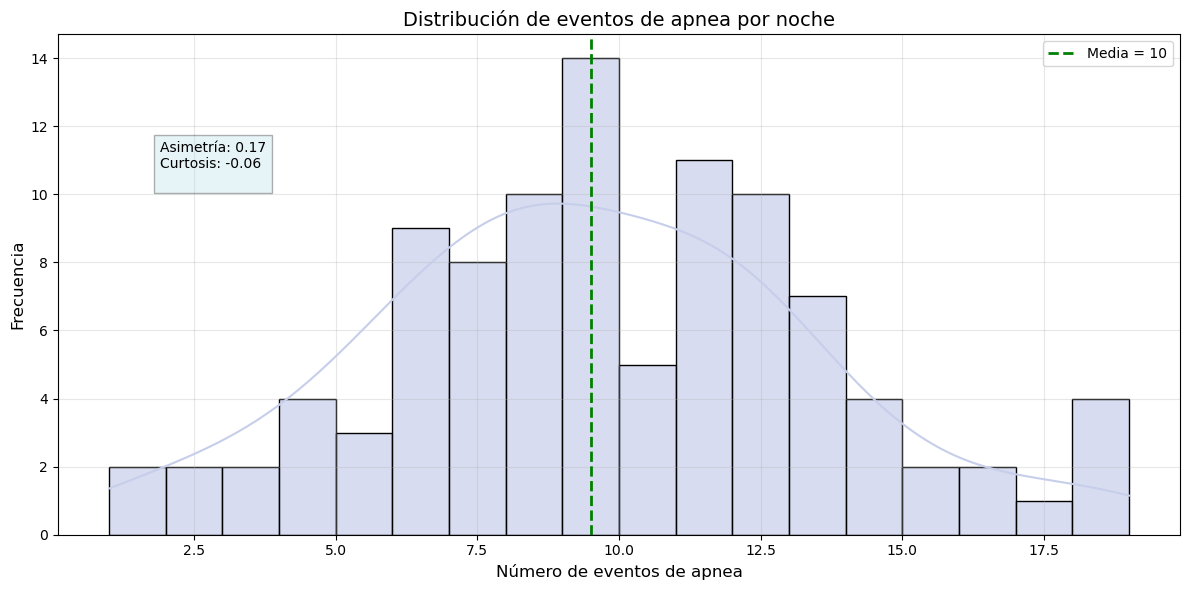

In [27]:
# Cálculo de medidas
skewness = skew(apnea_events)
kurt_value = kurtosis(apnea_events, fisher=True)  # Fisher=True: curtosis centrada en 0

# --- Imprimir medidas de distribución
print("\nMedidas de distribución:")
print(f"Asimetría: {skewness:.2f}")
print(f"Curtosis: {kurt_value:.2f}")

plt.figure(figsize=(12, 6))

# --- Histograma con KDE (estimación de densidad) ---
sns.histplot(apnea_events, bins=18, kde=True, color="#c7ceea", edgecolor='black', alpha=0.7)

# --- Líneas verticales para medidas de tendencia y dispersión ---
plt.axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Media = {mean_val:.0f}')

# --- Título y etiquetas de ejes ---
plt.title("Distribución de eventos de apnea por noche", fontsize=14)
plt.xlabel("Número de eventos de apnea", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

# --- Leyenda ---
plt.legend(fontsize=10)

# --- Agregar cuadro de texto con medidas de dispersión ---
y_text = plt.ylim()[1] * 0.7  # 70% del eje Y
x_text = minimum + (maximum - minimum) * 0.05  # 5% desde la izquierda
text_box = (
    f"Asimetría: {skewness:.2f}\n"
    f"Curtosis: {kurt_value:.2f}\n"
)
plt.text(x_text, y_text, text_box, bbox=dict(facecolor='lightblue', alpha=0.3), fontsize=10)

# --- Activar cuadrícula ---
plt.grid(True, alpha=0.3)

# --- Ajustar diseño  ---
plt.tight_layout()
plt.show()

### ***Análisis:***

**Asimetría:**
El valor calculado de asimetría es 0.17, lo que indica que la distribución del número de eventos de apnea por noche presenta un sesgo positivo muy leve. Este valor, al ser cercano a cero, sugiere que la distribución es prácticamente simétrica y se aproxima a una forma normal. La ligera asimetría hacia la derecha implica que, aunque la mayoría de las observaciones se concentran en torno a la media, existen algunos valores relativamente altos que prolongan la cola superior, sin llegar a constituir valores atípicos significativos.

Esta característica es visualizada en el histograma, donde predomina la concentración central con una extensión moderada hacia valores de 18 a 19 eventos por noche.

**Curtosis:**
El valor obtenido es -0.06, ligeramente inferior a cero, lo que indica una distribución levemente platicúrtica (menos apuntada que la normal).
Este resultado implica que la distribución presenta colas ligeramente menos pronunciadas y menor concentración en la media en comparación con la distribución normal, manteniendo una variabilidad muy similar a la esperada bajo normalidad.

### <span style="color:#2F749F;"><strong>Ejercicio 4: Cálculo de medidas de percentiles</strong></span>

A partir de la muestra generada en el Ejercicio 1, calcula los percentiles de los datos. Calcular:
1. Percentiles
2. Deciles
3. Cuartiles
4. Grafica los anteriores percentiles calculados, sobre la distribución de los datos



📌 Percentiles:
P10: 4.90
P25 (Q1): 7.00
P50 (Mediana): 9.00
P75 (Q3): 12.00
P90: 14.00

📌 Deciles:
D1: 4.90
D2: 6.00
D3: 7.70
D4: 8.60
D5: 9.00
D6: 11.00
D7: 11.30
D8: 12.20
D9: 14.00


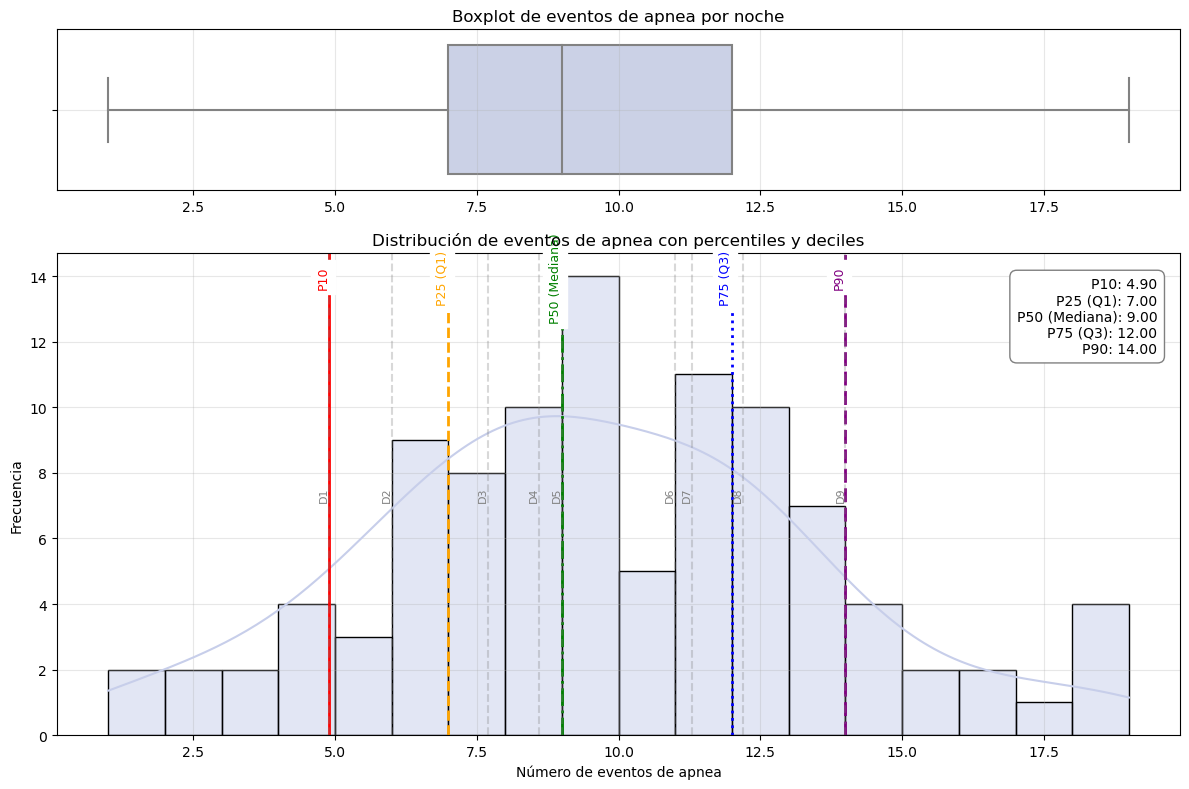

In [28]:
# --- Cálculo de percentiles ---
percentiles = {
    'P10': np.percentile(apnea_events, 10),
    'P25 (Q1)': np.percentile(apnea_events, 25),
    'P50 (Mediana)': np.percentile(apnea_events, 50),
    'P75 (Q3)': np.percentile(apnea_events, 75),
    'P90': np.percentile(apnea_events, 90)
}

# --- Cálculo de deciles (D1 a D9) ---
deciles = {f'D{i}': np.percentile(apnea_events, i * 10) for i in range(1, 10)}

# --- Imprimir valores en consola ---
print("\n📌 Percentiles:")
for etiqueta, valor in percentiles.items():
    print(f"{etiqueta}: {valor:.2f}")

print("\n📌 Deciles:")
for etiqueta, valor in deciles.items():
    print(f"{etiqueta}: {valor:.2f}")

# --- Crear figura con dos subplots ---
fig, axes = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 3]})

# --- Subplot 1: Boxplot ---
sns.boxplot(x=apnea_events, ax=axes[0], color="#c7ceea")
axes[0].set_title("Boxplot de eventos de apnea por noche", fontsize=12)
axes[0].set_xlabel("")  # sin etiqueta para no duplicar
axes[0].grid(alpha=0.3)

# --- Subplot 2: Histograma ---
sns.histplot(apnea_events, kde=True, color="#c7ceea", bins=18, ax=axes[1])

# Líneas verticales para percentiles principales
colors = {'P10': 'red', 'P25 (Q1)': 'orange', 'P50 (Mediana)': 'green',
          'P75 (Q3)': 'blue', 'P90': 'purple'}
linestyles = {'P10': '-', 'P25 (Q1)': '--', 'P50 (Mediana)': '-.',
              'P75 (Q3)': ':', 'P90': (0, (5, 2))}

for etiqueta, valor in percentiles.items():
    axes[1].axvline(valor, color=colors[etiqueta], linestyle=linestyles[etiqueta], linewidth=2)
    axes[1].text(valor, axes[1].get_ylim()[1]*0.95, etiqueta,
                 rotation=90, color=colors[etiqueta], fontsize=9,
                 verticalalignment='center', horizontalalignment='right',
                 backgroundcolor='white')

for i, (etiqueta, valor) in enumerate(deciles.items(), start=1):
    axes[1].axvline(valor, color='gray', linestyle='--', alpha=0.3)
    # Posición escalonada 
    axes[1].text(valor, axes[1].get_ylim()[1]*0.5, etiqueta,
                 rotation=90, color='gray', fontsize=8,
                 verticalalignment='center', horizontalalignment='right')

# Cuadro con valores principales de percentiles
texto_percentiles = "\n".join([f"{et}: {val:.2f}" for et, val in percentiles.items()])
axes[1].text(0.98, 0.95, texto_percentiles, transform=axes[1].transAxes,
             fontsize=10, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="gray"))

# Estética general
axes[1].set_title("Distribución de eventos de apnea con percentiles y deciles", fontsize=12)
axes[1].set_xlabel("Número de eventos de apnea")
axes[1].set_ylabel("Frecuencia")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### ***Análisis***

**Percentiles**
En los datos correspondientes al número de eventos de apnea registrados durante 100 noches, se observan los siguientes valores de percentiles:

- El percentil 10 (P10) es 4.9, lo que indica que el 10% de las observaciones presentan un número de eventos inferior a 4.9.
- El percentil 25 (P25 o cuartil 1) es 7, lo que significa que el 25% de las noches registraron un número de eventos igual o inferior a este valor.
- El percentil 50 (P50 o mediana) es 9, lo que indica que la mitad de las observaciones se encuentran por debajo o en este valor, reflejando la tendencia central de los datos.
- El percentil 75 (P75 o cuartil 3) alcanza 12, evidenciando que el 75% de los valores están por debajo o en dicho número de eventos.
- Por último, el percentil 90 (P90) es 14, lo que implica que el 90% de las observaciones se sitúan en un valor igual o inferior a 14 eventos por noche.

Estos percentiles permiten observar que la mayoría de las noches (del 10% al 90%) registraron entre 4.9 y 14 eventos. La mediana (9 eventos) se encuentra aproximadamente en el centro de este rango, indicando que la distribución es moderadamente simétrica en torno a la mediana 

El análisis visual refuerza esta interpretación: tanto el histograma como el boxplot evidencian que la concentración principal de datos se localiza entre el primer y tercer cuartil, con colas que, aunque se extienden hacia valores extremos (1 y 19), no presentan una densidad elevada. Esto confirma que la distribución está dominada por valores intermedios y carece de valores atípicos significativos.

## <span style="color:#1a73e8;"><strong>Parte 2: Análisis Bivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio 5: Análisis de correlación</strong></span>

En esta segunda parte, generar **dos variables** a partir de tú número de cédula y realiza un análisis **bivariado** para calcular la relación entre ellas.

1. Use los **6 últimos dígitos** de su cédula como base (similar al Ejercicio 1).  
2. Genere dos variables aleatorias (`eventos de apnea por noche` y `micro - despertares`) con distribución normal, usando esa base como **semilla reproducible**.  
3. Calcule los coeficientes de correlación de **Pearson** y **Spearman**. 
4. Grafique las variables analizadas 
5. Interprete los resultados.  



In [29]:
# --- Parámetros ---
n = 100
mean1 = (base % 10) + 2  # media para apnea_events
mean2 = (base % 10) + 10 # media para micro_arousals
std_dev = 4

# --- Generar variables aleatorias ---
apnea_events = np.random.normal(loc=mean1, scale=std_dev, size=n).round(0)
apnea_events = np.clip(apnea_events, 0, None)

micro_arousals = np.random.normal(loc=mean2, scale=std_dev, size=n).round(0)
micro_arousals = np.clip(micro_arousals, 0, None)


# --- Calcular correlaciones ---
pearson_corr = pearsonr(apnea_events, micro_arousals)[0]
spearman_corr = spearmanr(apnea_events, micro_arousals)[0]

# --- Mostrar resultados ---
print("\n📌 Correlaciones:")
print(f"Pearson: {pearson_corr:.3f}")
print(f"Spearman: {spearman_corr:.3f}")



📌 Correlaciones:
Pearson: -0.093
Spearman: -0.172


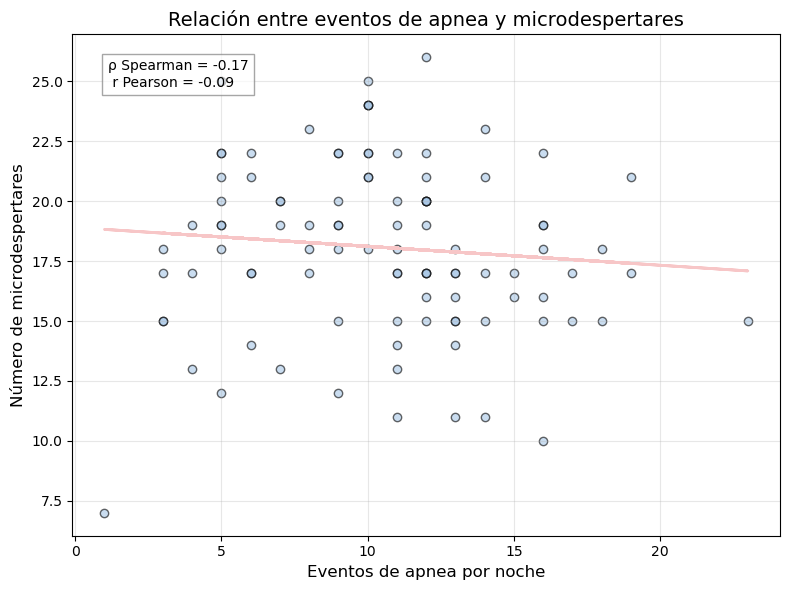

In [30]:
# --- Crear figura y eje ---
fig, ax = plt.subplots(figsize=(8, 6))

# --- Gráfico de dispersión ---
ax.scatter(apnea_events, micro_arousals, alpha=0.6, color="#a7c7e7", edgecolor="black", label="Datos")

m, b = np.polyfit(apnea_events, micro_arousals, 1)
ax.plot(apnea_events, m * apnea_events + b, color="#f7c6c7", linewidth=2, label="Tendencia")

# --- Etiquetas y título ---
ax.set_title("Relación entre eventos de apnea y microdespertares", fontsize=14)
ax.set_xlabel("Eventos de apnea por noche", fontsize=12)
ax.set_ylabel("Número de microdespertares", fontsize=12)

# --- Mostrar correlaciones en la gráfica ---
ax.text(0.05, 0.95,
        f"ρ Spearman = {spearman_corr:.2f}\n r Pearson = {pearson_corr:.2f}",
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='top',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))


ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### ***Análisis***

Se analizó la relación entre el número de eventos de apnea por noche y la cantidad de microdespertares utilizando dos medidas de correlación. El coeficiente de Pearson (r = -0.09) indica una relación lineal prácticamente nula entre ambas variables. De manera similar, el coeficiente de Spearman (ρ = -0.17) sugiere que, aunque existe una leve tendencia negativa, el cambio en el número de eventos no se asocia de manera consistente con el orden de los microdespertares.

En conjunto, estos resultados sugieren que no existe una asociación significativa ni lineal ni monotónica entre las dos variables. La mínima tendencia negativa observada carece de relevancia práctica, lo que indica que el aumento o disminución en el número de eventos de apnea por noche no se asocia de manera consistente con cambios en la cantidad de microdespertares.

### <span style="color:#2F749F;"><strong>Ejercicio 6: Chi-Cuadrado</strong></span>

En esta parte, analiza si existe **asociación estadística** entre dos variables categóricas simuladas a partir de tu número de cédula.

1. Usar los **6 últimos dígitos** de la cédula como base para generar una semilla reproducible.
2. Simula una muestra de **60 personas** con dos variables categóricas:
   - `Nivel educativo`: Básico, Medio, Superior.
   - `Acceso a internet`: Sí, No.
3. Crea una **tabla de contingencia** entre ambas variables.
4. Aplica la **prueba de Chi cuadrado de independencia**.
5. Visualiza la distribución conjunta con un mapa de calor (ver la imagen de con la información de ejemplo).
6. Interpreta el resultado.



Tabla de contingencia:
Acceso a internet  No  Sí
Nivel educativo          
Básico              5  14
Medio               6  18
Superior            2  15

Chi-cuadrado = 1.3812, p-valor = 0.5013, grados de libertad = 2

Frecuencias esperadas:
Acceso a internet        No         Sí
Nivel educativo                       
Básico             4.116667  14.883333
Medio              5.200000  18.800000
Superior           3.683333  13.316667


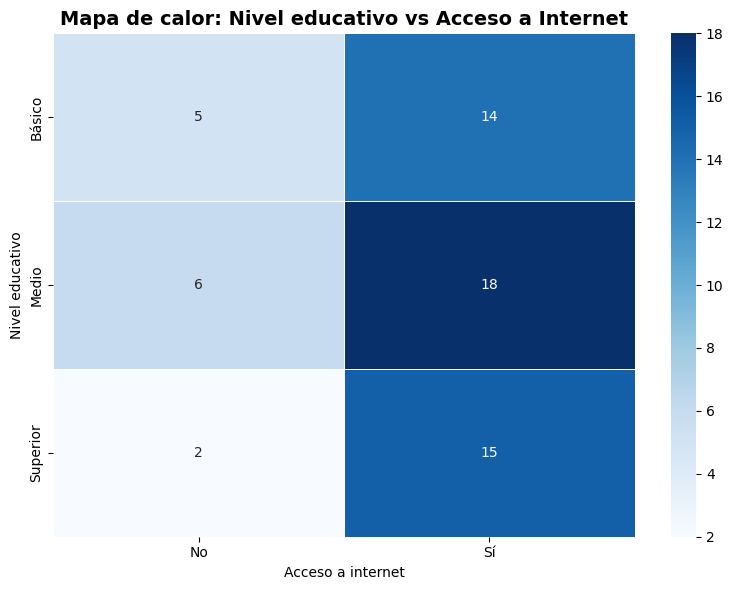

In [29]:
np.random.seed(base)

# --- Simulación de datos ---
n = 60
niveles = ["Básico", "Medio", "Superior"]
internet = ["Sí", "No"]

nivel_educativo = np.random.choice(niveles, size=n, p=[0.3, 0.4, 0.3])
acceso_internet = np.random.choice(internet, size=n, p=[0.7, 0.3])

# --- DataFrame ---
df = pd.DataFrame({
    "Nivel educativo": nivel_educativo,
    "Acceso a internet": acceso_internet
})

# --- Tabla de contingencia ---
tabla = pd.crosstab(df["Nivel educativo"], df["Acceso a internet"])
print("\nTabla de contingencia:")
print(tabla)

# --- Prueba Chi-cuadrado ---
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"\nChi-cuadrado = {chi2:.4f}, p-valor = {p:.4f}, grados de libertad = {dof}")
print("\nFrecuencias esperadas:")
print(pd.DataFrame(expected, index=tabla.index, columns=tabla.columns))

# --- Visualización con heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(tabla, annot=True, fmt="d", cmap="Blues", cbar=True, linewidths=0.5, linecolor='white')
plt.title("Mapa de calor: Nivel educativo vs Acceso a Internet", fontsize=14, fontweight="bold")
plt.ylabel("Nivel educativo")
plt.xlabel("Acceso a internet")
plt.tight_layout()
plt.show()

### ***Análisis***

El análisis se realizó considerando dos variables categóricas simuladas: nivel educativo (básico, medio y superior) y acceso a internet (sí o no). La tabla de contingencia muestra que la mayoría de los individuos reportan tener acceso a internet (47 personas), mientras que 13 no cuentan con este servicio.

Para la distribución por nivel educativo, se observa que dentro de quienes tienen acceso a internet, el grupo con nivel medio presenta la mayor frecuencia (18 personas), seguido por el nivel superior (15) y el nivel básico (14). En la categoría sin acceso a internet, el mayor número corresponde al nivel medio (6 personas), seguido del nivel básico (5) y finalmente el nivel superior (2). Esta distribución sugiere, que el acceso a internet es mayoritario en todos los niveles educativos, sin una diferencia aparente muy marcada entre ellos.

Para evaluar si existe una asociación estadísticamente significativa entre el nivel educativo y el acceso a internet, se aplicó la prueba de chi-cuadrado de independencia. El estadístico obtenido fue χ² = 1.3812 con 2 grados de libertad, y el valor p = 0.5013. Dado que este valor p es mayor que el umbral común de significancia (0.05), no se rechaza la hipótesis nula, concluyéndose que no hay evidencia suficiente para afirmar que el nivel educativo y el acceso a internet estén asociados en esta muestra.

Las frecuencias esperadas calculadas para cada combinación de categorías son similares a las observadas, lo que indica que las diferencias entre niveles educativos respecto al acceso a internet parecen deberse al azar y no a una relación sistemática.